In [ ]:
!git clone https://github.com/e11824496/ExpDesign_WS22.git

Cloning into 'ExpDesign_WS22'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 76 (delta 9), reused 16 (delta 3), pack-reused 50
Unpacking objects: 100% (76/76), done.


In [ ]:
%cd ExpDesign_WS22/UltraGCN/

/content/ExpDesign_WS22/UltraGCN


In [ ]:
!python main.py --config_file ml-1m_config.ini

###################### UltraGCN ######################
1. Loading Configuration...
/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(

Computing \Omega for the item-item graph... 
i-i constraint matrix 0 ok
Computation \Omega OK!
store object in path = ./ml-1m_ii_neighbor_mat ok
store object in path = ./ml-1m_ii_constraint_mat ok
Load Configuration OK, show them below
Configuration:
{'embedding_dim': 128, 'ii_neighbor_num': 10, 'model_save_path': './ultragcn_ml-1m.pt', 'max_epoch': 2000, 'enable_tensorboard': True, 'initial_weight': 0.001, 'dataset': 'ml-1m', 'gpu': '0',

In [2]:
recall_paper = 0.278671208895094
ndcg_paper = 0.26421063460327485

recall_reproduced = 0.2777892283166292
ndcg_reproduced = 0.26392490396180135

recall_repro_off_by = (recall_reproduced - recall_paper) / recall_paper
ndcg_repro_off_by = (ndcg_reproduced - ndcg_paper) / ndcg_paper

print(f"reproduced recall off by {round(recall_repro_off_by * 100, 2)}%")
print(f"reproduced NDCG off by {round(ndcg_repro_off_by * 100, 2)}%")
print()
print(f"difference in epochs needed when reproducing: {129 - 136} epochs or {round((129 - 136) / 136 * 100, 2)}%")

reproduced recall off by -0.32%
reproduced NDCG off by -0.11%

difference in epochs needed when reproducing: -7 epochs or -5.15%


## Ablation study
disable different parameters by overwriting:
1. lambda = 0, gamma = 0
1. lambda = 0
1. gamma = 0

In [ ]:
import main_custom_parameters as main

main.run('amazon_config.ini', report_progress=False)

###################### UltraGCN ######################
1. Loading Configuration...



In [ ]:
recall_paper = 0.06809152719270753
ndcg_paper = 0.05558807004339008

recall_reproduced = 0.2777892283166292
ndcg_reproduced = 0.26392490396180135

recall_repro_off_by = (recall_reproduced - recall_paper) / recall_paper
ndcg_repro_off_by = (ndcg_reproduced - ndcg_paper) / ndcg_paper

print(f"reproduced recall off by {round(recall_repro_off_by * 100, 2)}%")
print(f"reproduced NDCG off by {round(ndcg_repro_off_by * 100, 2)}%")
print()
print(f"difference in epochs needed when reproducing: {129 - 136} epochs or {round((129 - 136) / 136 * 100, 2)}%")

In [2]:
main.run('amazon_config.ini', lambda_=0, gamma=0, report_progress=False)

###################### UltraGCN ######################
1. Loading Configuration...


/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(



Computing \Omega for the item-item graph... 
i-i constraint matrix 0 ok
Computation \Omega OK!
store object in path = ./ml-1m_ii_neighbor_mat ok
store object in path = ./ml-1m_ii_constraint_mat ok
Load Configuration OK, show them below
Configuration:
{'embedding_dim': 128, 'ii_neighbor_num': 10, 'model_save_path': './ultragcn_ml-1m.pt', 'max_epoch': 2000, 'enable_tensorboard': True, 'initial_weight': 0.001, 'dataset': 'ml-1m', 'gpu': '0', 'device': device(type='cuda', index=0), 'lr': 0.001, 'batch_size': 1024, 'early_stop_epoch': 50, 'w1': 1e-07, 'w2': 1.0, 'w3': 1e-07, 'w4': 1.0, 'negative_num': 200, 'negative_weight': 200.0, 'gamma': 0, 'lambda': 0, 'sampling_sift_pos': False, 'test_batch_size': 2048, 'topk': 20, 'user_num': 6022, 'item_num': 3043}
Total training batches = 778


/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


##########################################
Early stop is triggered at 95 epochs.
Results:
best epoch = 25, best recall = 0.26376766521827877, best ndcg = 0.24618628698587772
The best model is saved at ./ultragcn_ml-1m.pt
Training end!
END


In [3]:
main.run('amazon_config.ini', lambda_=0, report_progress=False)

###################### UltraGCN ######################
1. Loading Configuration...

load path = ./ml-1m_ii_constraint_mat object
load path = ./ml-1m_ii_neighbor_mat object
Load Configuration OK, show them below
Configuration:
{'embedding_dim': 128, 'ii_neighbor_num': 10, 'model_save_path': './ultragcn_ml-1m.pt', 'max_epoch': 2000, 'enable_tensorboard': True, 'initial_weight': 0.001, 'dataset': 'ml-1m', 'gpu': '0', 'device': device(type='cuda', index=0), 'lr': 0.001, 'batch_size': 1024, 'early_stop_epoch': 50, 'w1': 1e-07, 'w2': 1.0, 'w3': 1e-07, 'w4': 1.0, 'negative_num': 200, 'negative_weight': 200.0, 'gamma': 0.0001, 'lambda': 0, 'sampling_sift_pos': False, 'test_batch_size': 2048, 'topk': 20, 'user_num': 6022, 'item_num': 3043}
Total training batches = 778
##########################################
Early stop is triggered at 131 epochs.
Results:
best epoch = 81, best recall = 0.2779974602196757, best ndcg = 0.26317962348703133
The best model is saved at ./ultragcn_ml-1m.pt
Training 

In [4]:
main.run('amazon_config.ini', gamma=0, report_progress=False)

###################### UltraGCN ######################
1. Loading Configuration...

load path = ./ml-1m_ii_constraint_mat object
load path = ./ml-1m_ii_neighbor_mat object
Load Configuration OK, show them below
Configuration:
{'embedding_dim': 128, 'ii_neighbor_num': 10, 'model_save_path': './ultragcn_ml-1m.pt', 'max_epoch': 2000, 'enable_tensorboard': True, 'initial_weight': 0.001, 'dataset': 'ml-1m', 'gpu': '0', 'device': device(type='cuda', index=0), 'lr': 0.001, 'batch_size': 1024, 'early_stop_epoch': 50, 'w1': 1e-07, 'w2': 1.0, 'w3': 1e-07, 'w4': 1.0, 'negative_num': 200, 'negative_weight': 200.0, 'gamma': 0, 'lambda': 0.001, 'sampling_sift_pos': False, 'test_batch_size': 2048, 'topk': 20, 'user_num': 6022, 'item_num': 3043}
Total training batches = 778
##########################################
Early stop is triggered at 96 epochs.
Results:
best epoch = 30, best recall = 0.26274388673973464, best ndcg = 0.2427880831841379
The best model is saved at ./ultragcn_ml-1m.pt
Training en

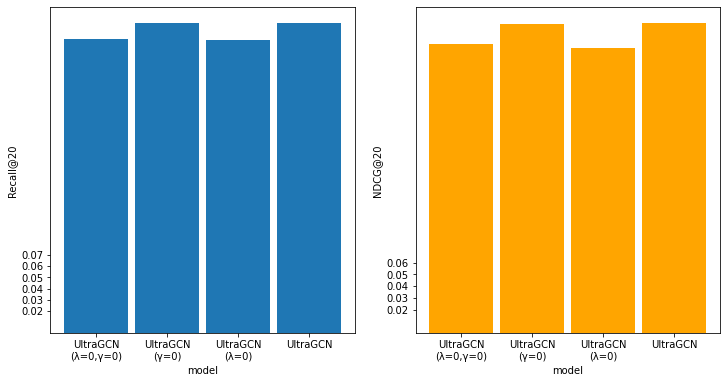

In [8]:
import numpy as np
import matplotlib.pyplot as plt

n = 4
model_names = ['UltraGCN\n(\u03BB=0,\u03B3=0)', 'UltraGCN\n(\u03B3=0)', 'UltraGCN\n(\u03BB=0)', 'UltraGCN']
recall_results = [0.26376766521827877, 0.2779974602196757, 0.26274388673973464, recall_paper]
ndcg_results = [0.24618628698587772, 0.26317962348703133, 0.2427880831841379, ndcg_paper]

plt_, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].bar(range(n), recall_results, width=0.9, tick_label=model_names)
ax[0].set_xticks(range(n))
ax[0].set_yticks(np.arange(0.02, 0.08, 0.01))
ax[0].set_xlabel('model')
ax[0].set_ylabel('Recall@20')

ax[1].bar(range(n), ndcg_results, width=0.9, color='orange', tick_label=model_names)
ax[1].set_xticks(range(n))
ax[1].set_yticks(np.arange(0.02, 0.07, 0.01))
ax[1].set_xlabel('model')
ax[1].set_ylabel('NDCG@20')

plt.show()